In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


EDA

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [86]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [88]:
train_data = x_train.join(y_train)

In [89]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8693,-118.33,33.86,36.0,854.0,160.0,473.0,150.0,6.3992,<1H OCEAN,259600.0
9595,-120.44,37.31,16.0,3369.0,532.0,1770.0,574.0,5.2662,INLAND,126200.0
16615,-120.92,35.40,23.0,2059.0,354.0,636.0,278.0,3.6908,NEAR OCEAN,278800.0
12086,-117.38,33.89,12.0,3964.0,524.0,1707.0,549.0,5.1624,INLAND,267900.0
11259,-117.97,33.81,30.0,2406.0,462.0,1753.0,456.0,4.4850,<1H OCEAN,180600.0
...,...,...,...,...,...,...,...,...,...,...
8602,-118.38,33.87,27.0,2287.0,491.0,1101.0,466.0,4.6750,<1H OCEAN,316900.0
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,INLAND,213300.0
4545,-118.20,34.02,48.0,2230.0,593.0,2419.0,598.0,2.3944,<1H OCEAN,130700.0
7299,-118.20,33.99,35.0,1705.0,523.0,2252.0,508.0,2.3421,<1H OCEAN,154200.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

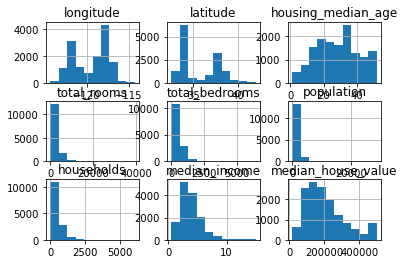

In [90]:
train_data.hist()

<AxesSubplot:>

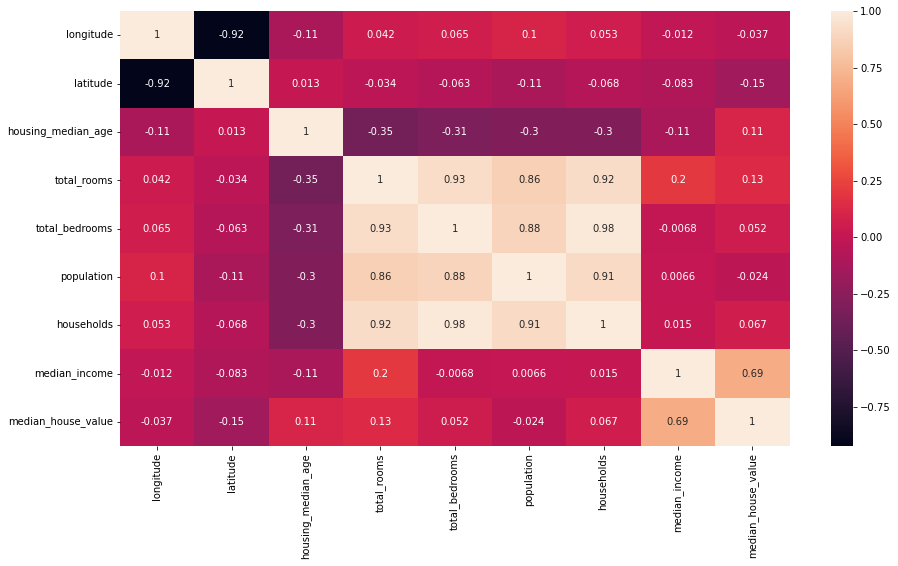

In [91]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

Data Processing

In [92]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

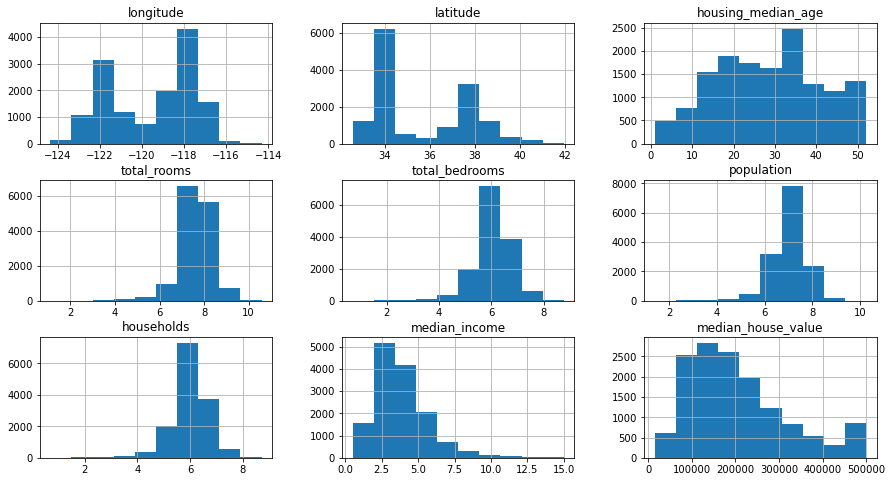

In [93]:
train_data.hist(figsize=(15,8))

In [94]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     6329
INLAND        4567
NEAR OCEAN    1833
NEAR BAY      1570
ISLAND           4
Name: ocean_proximity, dtype: int64

In [95]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [96]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8693,-118.33,33.86,36.0,6.751101,5.081404,6.161207,5.017280,6.3992,259600.0,1,0,0,0,0
9595,-120.44,37.31,16.0,8.122668,6.278521,7.479300,6.354370,5.2662,126200.0,0,1,0,0,0
16615,-120.92,35.40,23.0,7.630461,5.872118,6.456770,5.631212,3.6908,278800.0,0,0,0,0,1
12086,-117.38,33.89,12.0,8.285261,6.263398,7.443078,6.309918,5.1624,267900.0,0,1,0,0,0
11259,-117.97,33.81,30.0,7.786136,6.137727,7.469654,6.124683,4.4850,180600.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,-118.38,33.87,27.0,7.735433,6.198479,7.004882,6.146329,4.6750,316900.0,1,0,0,0,0
10018,-121.20,39.23,9.0,7.938446,6.104793,6.862758,6.037871,5.2359,213300.0,0,1,0,0,0
4545,-118.20,34.02,48.0,7.710205,6.386879,7.791523,6.395262,2.3944,130700.0,1,0,0,0,0
7299,-118.20,33.99,35.0,7.441907,6.261492,7.720018,6.232448,2.3421,154200.0,1,0,0,0,0


<AxesSubplot:>

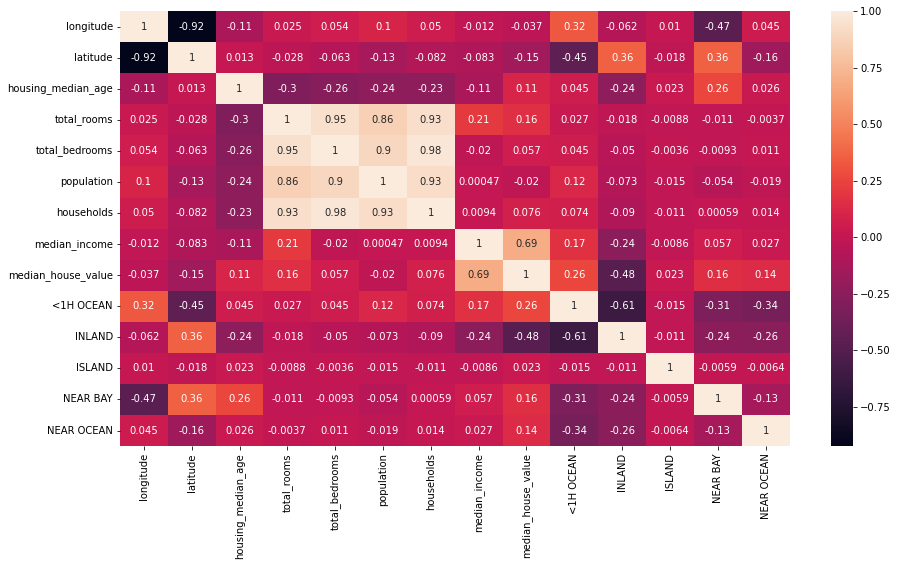

In [97]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

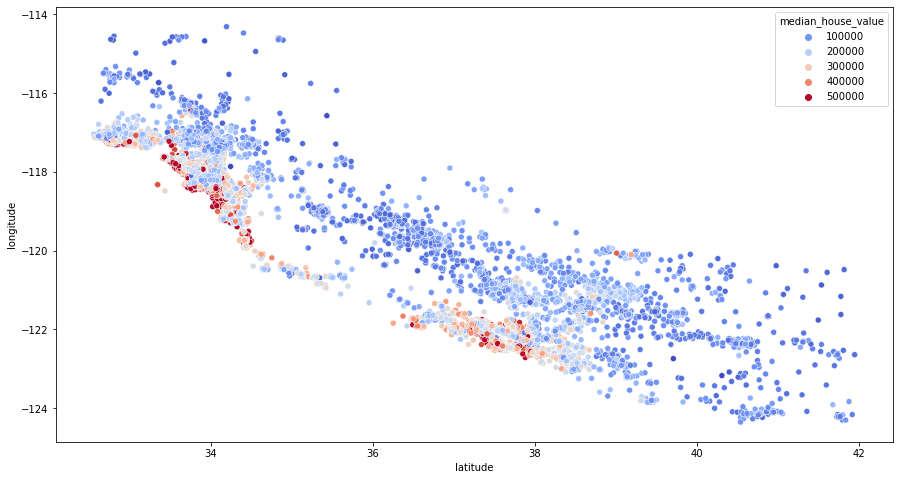

In [98]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [99]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

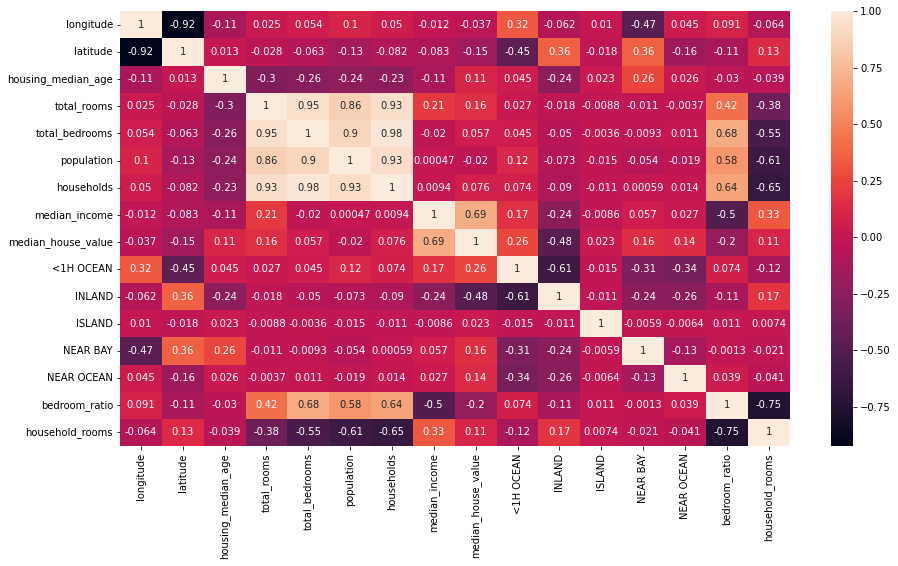

In [100]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

Linear Regression model

In [101]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [102]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [103]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20450,-118.91,34.28,6.0,8.717191,7.034388,8.085487,6.968850,5.2206,1,0,0,0,0,0.806956,1.250879
9547,-120.84,37.40,7.0,7.928046,6.274762,7.226209,6.226537,2.6214,0,1,0,0,0,0.791464,1.273267
1207,-121.75,39.40,29.0,7.431300,5.793014,6.762730,5.814131,2.4943,0,1,0,0,0,0.779542,1.278145
7658,-118.21,33.84,28.0,6.712956,5.327876,6.442540,5.262690,3.4583,1,0,0,0,0,0.793671,1.275575
18638,-121.98,36.99,14.0,8.822912,7.282761,8.136518,7.213768,3.5943,0,0,0,0,1,0.825437,1.223066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16200,-121.27,37.95,52.0,7.184629,5.733341,7.221836,5.739793,1.8261,0,1,0,0,0,0.798001,1.251723
8798,-118.42,33.78,36.0,7.646831,5.717028,6.688355,5.707110,8.0957,0,0,0,0,1,0.747634,1.339878
14088,-117.09,32.76,43.0,8.266164,6.568078,7.290975,6.498282,3.5529,0,0,0,0,1,0.794574,1.272054
8141,-118.11,33.82,36.0,7.463363,5.831882,6.754604,5.834811,4.6875,1,0,0,0,0,0.781401,1.279110


In [104]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8693,-118.33,33.86,36.0,6.751101,5.081404,6.161207,5.017280,6.3992,1,0,0,0,0,0.752678,1.345570
9595,-120.44,37.31,16.0,8.122668,6.278521,7.479300,6.354370,5.2662,0,1,0,0,0,0.772963,1.278281
16615,-120.92,35.40,23.0,7.630461,5.872118,6.456770,5.631212,3.6908,0,0,0,0,1,0.769563,1.355030
12086,-117.38,33.89,12.0,8.285261,6.263398,7.443078,6.309918,5.1624,0,1,0,0,0,0.755969,1.313054
11259,-117.97,33.81,30.0,7.786136,6.137727,7.469654,6.124683,4.4850,1,0,0,0,0,0.788289,1.271272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,-118.38,33.87,27.0,7.735433,6.198479,7.004882,6.146329,4.6750,1,0,0,0,0,0.801310,1.258545
10018,-121.20,39.23,9.0,7.938446,6.104793,6.862758,6.037871,5.2359,0,1,0,0,0,0.769016,1.314776
4545,-118.20,34.02,48.0,7.710205,6.386879,7.791523,6.395262,2.3944,1,0,0,0,0,0.828367,1.205612
7299,-118.20,33.99,35.0,7.441907,6.261492,7.720018,6.232448,2.3421,1,0,0,0,0,0.841383,1.194058


In [105]:
reg.score(x_test,y_test)

0.6739733975766924